# RAMP starting kit on the Human Locomotion data set

#### Publication

Truong, C., Barrois-Müller, R., Moreau, T., Provost, C., Vienne-Jumeau, A., Moreau, A., Vidal, P.-P., Vayatis, N., Buffat, S., Yelnik, A., Ricard, D., & Oudre, L. (2019). A data set for the study of human locomotion with inertial measurements units. Image Processing On Line (IPOL), 9. [[doi]](https://doi.org/10.5201/ipol.2019.265) [[pdf]](http://deepcharles.github.io/files/ipol-walk-data-2019.pdf) [[online demo]](http://ipolcore.ipol.im/demo/clientApp/demo.html?id=265)

## Getting Started

### Prerequisites

- Python >=3.7
- numpy
- scipy
- pandas
- scikit-learn
- matplolib
- jupyter
- ramp-workflow

The following cell will install if necessary the missing dependencies.

In [1]:
import sys
!{sys.executable} -m pip install scikit-learn

# Install ramp-workflow from the master branch on GitHub.
!{sys.executable} -m pip install https://api.github.com/repos/paris-saclay-cds/ramp-workflow/zipball/master

  Using cached https://api.github.com/repos/paris-saclay-cds/ramp-workflow/zipball/master
  Stored in directory: /private/var/folders/ph/5_xrvcbs293bzpxgdhh1vdzh0000gn/T/pip-ephem-wheel-cache-4kqbyarp/wheels/06/a6/99/b0e319f45edc7ed9085d61ea00b0a33af4fe2f9cb76bf3af01
Successfully built ramp-workflow


In [2]:
%load_ext autoreload
%autoreload 2

In order to download the download the data, execute the following command:

```
python download_data.py
```

## Introduction

**Context**

The study of human gait is a central problem in medical research with far-reaching consequences in the public health domain.
This complex mechanism can be altered by a wide range of pathologies (such as Parkinson’s disease, arthritis, stroke,...), often resulting in a significant loss of autonomy and an increased risk of fall.
Understanding the influence of such medical disorders on a subject's gait would greatly facilitate early detection and prevention of those possibly harmful situations.
To address these issues, clinical and bio-mechanical researchers have worked to objectively quantify gait characteristics.


Among the gait features that have proved their relevance in a medical context, several are linked to the notion of step (step duration, variation in step length, etc.), which can be seen as the core atom of the locomotion process.
Many algorithms have therefore been developed to automatically (or semi-automatically) detect gait events (such as heel-strikes, heel-off, etc.) from accelerometer/gyrometer signals.

Most of the time, the algorithms used for step detection are dedicated to a specific population (healthy subjects, elderly subjects, Parkinson patients, etc.) and only a few publications deal with heterogeneous populations composed of several types of subjects.
Another limit to existing algorithms is that they often focus on locomotion in established regime (once the subject has initiated its gait) and do not deal with steps during U-turn, gait initiation or gait termination.
Yet, initiation and termination steps are particularly sensitive to pathological states.
For example, the first step of Parkinsonian patients has been described as slower and smaller that the first step of age-matched subjects.
U-turn steps are also interesting since 45% of daily living walking is made up of turning steps, and when compared to straight-line walking, turning has been emphasized as a high-risk fall situation.
This argues for reliable algorithms that could detect initiation, termination and turning steps in both healthy and pathological subjects.


**Step detection**

The objective is to recognize the **start and end times of footsteps** contained in accelerometer and gyrometer signals recorded with Inertial Measurement Units (IMUs).



## Data collection and clinical protocol

#### Participants

The data was collected between April 2014 and October 2015 by monitoring healthy (control) subjects and patients from several medical departments (see [publication](#Publication) for more information).
Participants are divided into three groups depending on their impairment:
- **Healthy** subjects had no known medical impairment.
- The **orthopedic group** is composed of 2 cohorts of distinct pathologies: lower limb osteoarthrosis and cruciate ligament injury.
- The **neurological group** is composed of 4 cohorts: hemispheric stroke, Parkinson's disease, toxic peripheral neuropathy and radiation induced leukoencephalopathy.

Note that certain participants were recorded on multiple occasions, therefore several trials may correspond to the same person.
In the training set and in the testing set, the proportion of trials coming from the "healthy", "orthopedic" and "neurological" groups is roughly the same, 24%, 24% and 52% respectively.

#### Protocol and equipment

All subjects underwent the same protocol described below. First, a IMU (Inertial Measurement Unit) that recorded accelerations and angular velocities was attached to each foot.
All signals have been acquired at 100 Hz with two brands of IMUs: XSens&trade; and Technoconcept&reg;.
One brand of IMU was attached to the dorsal face of each foot.
(Both feet wore the same brand.)
After sensor fixation, participants were asked to perform the following sequence of activities:
- stand for 6 s,
- walk 10 m at preferred walking speed on a level surface to a previously shown turn point,
- turn around (without previous specification of a turning side),
- walk back to the starting point,
- stand for 2 s.

Subjects walked at their comfortable speed with their shoes and without walking aid.
This protocol is schematically illustrated in the following figure.


<div style="text-align: center">
<img src="https://raw.githubusercontent.com/ramp-kits/human_locomotion/master/images/protocol-schema.png" width="500px">
</div>


Each IMU records its acceleration and angular velocity in the $(X, Y, Z, V)$ set of axes defined in the following figure.
The $V$ axis is aligned with gravity, while the $X$, $Y$ and $Z$ axes are attached to the sensor.
<div style="text-align: center">
<img src="https://raw.githubusercontent.com/ramp-kits/human_locomotion/master/images/sensor-photo.png" width="500px">
</div>

<div style="text-align: center">
<img src="https://raw.githubusercontent.com/ramp-kits/human_locomotion/master/images/sensor-position.png" width="500px">
</div>


## Step detection in a clinical context

The following schema describes how step detection methods are integrated in a clinical context.
<br/><br/>
<div style="text-align: center">
<img src="https://raw.githubusercontent.com/ramp-kits/human_locomotion/master/images/step-detection-schema.png" width="500px">
</div>

(1) During a trial, sensors send their own acceleration and angular velocity to the physician's computer.

(2) A software on the physician's computer synchronizes the data sent from both sensors and produces two multivariate signals (of same shape), each corresponding to a foot.


A step detection procedure is applied on each signal to produce two lists of footsteps (one per foot/sensor).
The numbers of left footsteps and right footsteps are not necessarily the same.
Indeed, subjects often have a preferred foot to initiate and terminate a walk or a u-turn, resulting in one or more footsteps from this preferred foot.
The starts and ends of footsteps are then used to create meaningful features to characterize the subject's gait.

## Data

During a trial, a subject executes the protocol described above.
This produces two multivariates signals (one for each foot/sensor) and for each signal, a number of footsteps have be annotated.
In addition, information (metadata) about the trial and participant are provided.
All three elements (signal, step annotation and metadata) are detailled in this section.

In [3]:
# loading the data
from problem import get_train_data, get_test_data

data_train, labels_train = get_train_data()
data_test, labels_test = get_test_data()
# print some information
msg = f"There are {len(data_train)} elements in the training set, and {len(data_test)} in the testing set."
print(msg)

There are 1304 elements in the training set, and 328 in the testing set.


Each element of either `data_train` or `data_test` is a signal collected from a single sensor (left or right foot) on a given trial, augmented with a set of metadata; `labels_train` or `labels_test` contain the footsteps that were manually annotated by medical experts from the sensor signals.

In [10]:
# illustrative example of a sensor recording
index = 60
sensor_data, step_list = data_train[index], labels_train[index]

### Signal

Each IMU that the participants wore provided $\mathbb{R}^{8}$-valued signals, sampled at 100 Hz.
In this setting, each dimension is defined by the signal type (`A` for acceleration, `R` for angular velocity) and the axis (`X`, `Y`, `Z` or `V`).
For instance, `RX` denotes the angular velocity around the `X`-axis.
Accelerations are given in $m/s^2$ and angular velocities, in $deg/s$.
The signal is available in the `.signal` attribute as a `Pandas` dataframe.

Note that this multivariate signal originates from a single sensor.
Therefore a single trial produces two signals (i.e. two training/testing instances).

,AV,AX,AY,AZ,RV,RX,RY,RZ
0,-0.000439,-0.004135,0.016903,0.000043,0.774620,-0.568260,-0.120206,1.311386
1,-0.000915,-0.003471,0.009806,0.000036,0.806661,-0.896106,-0.131150,1.562742
2,-0.002115,-0.009141,0.003184,0.003174,0.309003,-1.092802,0.185753,1.049143
3,0.001096,-0.006035,0.007288,0.004444,0.587878,-0.754070,0.152980,1.169350
4,0.002026,-0.004727,0.000714,0.005625,0.520481,-0.743126,-0.557316,1.180236


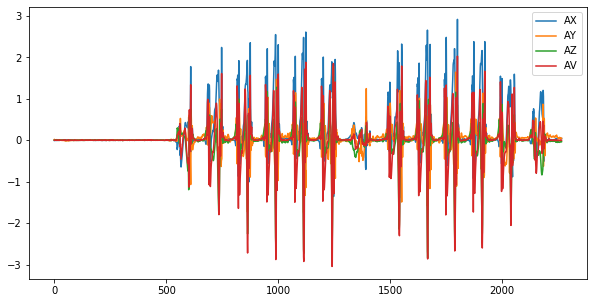

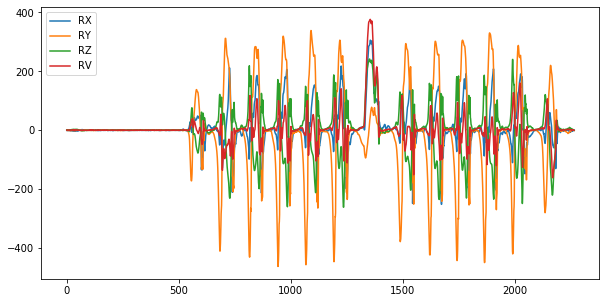

In [21]:
# The signal is available in the `signal` attribute.
sensor_data.signal[["AX", "AY", "AZ", "AV"]].plot(figsize=(10, 5))  # select the accelerations
sensor_data.signal[["RX", "RY", "RZ", "RV"]].plot(figsize=(10, 5))  # select the angular velocities

sensor_data.signal.head()

The "flat part" at the beginning of each dimension is the result of the participants standing still for a few
seconds before walking (see [Protocol](#Protocol-and-equipment)).
The same behaviour can be seen at the end of each dimension (often but not always), though for a quite smaller duration.

###  Metadata
A number of metadata (either numerical or categorical) are provided for each sensor recording, detailing the participant being monitored and the sensor position:

- `trial_code`: unique identifier for the trial;
- `age` (in years);
- `gender`: male ("M") or female ("F");
- `height` (in meters);
- `weight` (in kilograms);
- `bmi` (in kg/m2): body mass index;
- `laterality`: subject's "footedness" or "foot to kick a ball" ("Left", "Right" or "Ambidextrous").
- `sensor`: brand of the IMU used for the recording (“XSens” or “TCon”);
- `pathology_group`: this variable takes value in {“Healthy”, “Orthopedic”, “Neurological”};
- `is_control`: whether the subject is a control subject ("Yes" or "No");
- `foot`: foot on which the sensor was attached ("Left" or "Right").

These are accessible using the notation `sensor_data.<metadata>`.

In [16]:
msg = f"""Metadata:
age\t\t{sensor_data.age},
gender\t\t{sensor_data.gender},
height\t\t{sensor_data.height},
weight\t\t{sensor_data.weight},
bmi\t\t{sensor_data.bmi},
laterality\t{sensor_data.laterality},
sensor\t\t{sensor_data.sensor},
pathology_group\t{sensor_data.pathology_group},
trial code\t{sensor_data.trial_code},
foot\t\t{sensor_data.foot}."""
print(msg)

Metadata:
age		43,
gender		M,
height		1.74,
weight		81,
bmi		26.8,
laterality	Right,
sensor		XSens,
pathology_group	Orthopedic,
trial code	3-126,
foot		Left.


### Step annotation (the "label" to predict)
Footsteps were manually annotated by specialists using a software that displayed the signals from the relevant sensor (left or right foot) and allowed the specialist to indicate the starts and ends of each step.

A footstep is defined as the period during which the foot is moving.
Footsteps are separated by periods when the foot is still and flat on the floor.
Therefore, in our setting, a footstep starts with a heel-off and ends with the following toe-strike of the same foot.


Footsteps (the "label" to predict from the signal) are contained in a list whose elements are list of two integers, the start and end indexes. For instance:

In [17]:
print(step_list)

[[544, 620], [673, 758], [805, 887], [931, 1012], [1055, 1132], [1177, 1267], [1323, 1410], [1474, 1564], [1612, 1688], [1734, 1811], [1854, 1932], [1980, 2060], [2125, 2197]]


Visualization of footsteps and signals:

For the trial '3-126', 13 footsteps were annotated on the left foot:
[[544, 620], [673, 758], [805, 887], [931, 1012], [1055, 1132], [1177, 1267], [1323, 1410], [1474, 1564], [1612, 1688], [1734, 1811], [1854, 1932], [1980, 2060], [2125, 2197]]


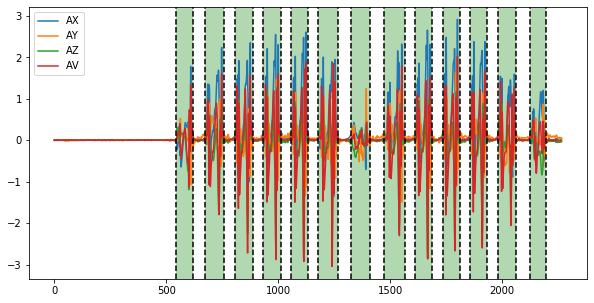

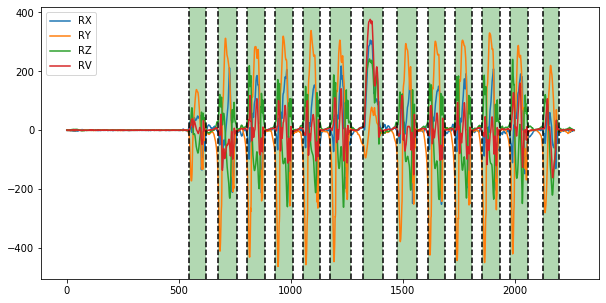

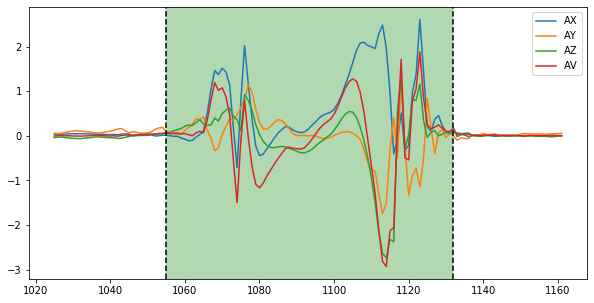

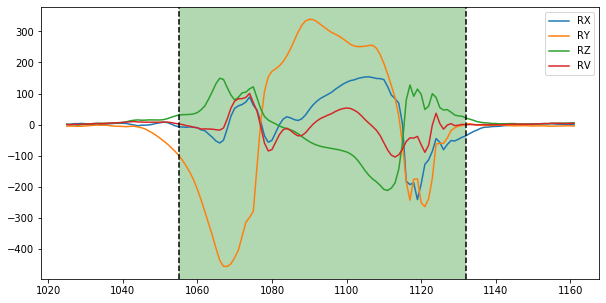

In [18]:
msg = f"For the trial '{sensor_data.trial_code}', {len(step_list)} footsteps were annotated on the {sensor_data.foot.lower()} foot:"
print(msg)
print(step_list)

# Color the footsteps
ax = sensor_data.signal[["AX", "AY", "AZ", "AV"]].plot(figsize=(10, 5))
line_args = {"linestyle": "--", "color": "k"}
for (start, end) in step_list:
    ax.axvline(start, **line_args)
    ax.axvline(end, **line_args)
    ax.axvspan(start, end, facecolor='g', alpha=0.3)

ax = sensor_data.signal[["RX", "RY", "RZ", "RV"]].plot(figsize=(10, 5))
for (start, end) in step_list:
    ax.axvline(start, **line_args)
    ax.axvline(end, **line_args)
    ax.axvspan(start, end, facecolor='g', alpha=0.3)

# Close-up on a footstep
start, end = step_list[4]

ax = sensor_data.signal[["AX", "AY", "AZ", "AV"]][start-30:end+30].plot(figsize=(10, 5))
ax.axvline(start, **line_args)
ax.axvline(end, **line_args)
ax.axvspan(start, end, facecolor='g', alpha=0.3)

ax = sensor_data.signal[["RX", "RY", "RZ", "RV"]][start-30:end+30].plot(figsize=(10, 5))
ax.axvline(start, **line_args)
ax.axvline(end, **line_args)
ax.axvspan(start, end, facecolor='g', alpha=0.3)


**On the first two plots.**
The repeated patterns (colored in light green) correspond to periods when the foot is moving.
During the non-annotated periods, the foot is flat and not moving and the signals are constant.
Generally, steps at the beginning and end of the recording, as well as during the u-turn (in the middle of the signal approximatively, see [Protocol](#Protocol-and-equipment)) are a bit different from the other ones.

**On the last two plots.** A close-up on a single footstep.

### General comments

- In this data set, for a given trial, the signals from the left and right feet are not bundled together. Instead, they produce two different training/testing instances. To recover the signals from both feet and treat them simultaneously, participants need only to find those with the same `.trial_code`. However, there still must be one prediction (step detection) per foot/sensor.

- Some metadata (namely `.age`, `.height`, `.weight`, `.bmi` and `.laterality`) can take the value "NC" which stands for "Not Communicated". This label replaces missing data and depending on the variable may affect up to 2% of the database.

- In the whole data set, each `trial_code` value appears exactly twice, because a single trial yields a recording for the right foot and another for the left foot. The concatenation of `trial_code` and `foot` uniquely identifies a recording.

- There are uncertainties in the definition of the starts and ends of the steps. Indeed, we can see on previous figures that the start and end could be slightly moved. However, our choice of metric is relatively immune to small variations in the start and end of footsteps.

- There is a lot of variability in the step patterns depending on the pathology, the age, the weight, the sensor brand, etc. We invite the participants to skim through the different trials to see how footsteps vary. Generally, long signals (over 40 seconds) display pathological behaviours.

- Metadata are provided to help with the step detection task. For instance, one could learn a different model for each pathology group. But it is not compulsory to use them.

- For a given `trial_code`, the two associated signals (left foot sensor and right foot sensor) have the same duration (and therefore the same shape). However they might not have the same number of annotated footsteps. Indeed, it often happens that one foot makes one step more compared to the other. Also, between trials, the number of signal samples greatly varies.

### Simple data exploration

In [19]:
from collections import Counter

import numpy as np


def get_avg_min_max(a_list) -> str:
    """[a_1, a_2,...] -> 'avg (min: minimum, max: maximum)'"""
    return f'{np.mean(a_list):.1f} (min: {np.min(a_list):.1f}, max: {np.max(a_list):.1f})'

print("On average, in the training set:")

# signal duration
sampling_freq = 100 # Hz
duration_list = [sensor_data.signal.shape[0]/sampling_freq for sensor_data in data_train]
print(f"- a recording lasts {get_avg_min_max(duration_list)} seconds;")


# Number of steps per recording per foot
n_steps_list = [len(step_list) for step_list in labels_train]
print(f"- there are {get_avg_min_max(n_steps_list)} steps per recording per foot;")

# Footstep duration
step_duration_list = list()
for step_list in labels_train:
    step_duration_list.extend(np.diff(step_list).flatten()/sampling_freq)  # list of footstep durations
print(f"- a footstep lasts {get_avg_min_max(step_duration_list)} second;")

# Pathology distribution
pathology_counter = Counter(sensor_data.pathology_group for sensor_data in data_train)
print(f"- group distribution: {pathology_counter['Healthy']} 'Healthy', {pathology_counter['Neurological']} 'Neurological', {pathology_counter['Orthopedic']} 'Orthopedic'.")

On average, in the training set:
- a recording lasts 30.6 (min: 11.7, max: 186.4) seconds;
- there are 20.1 (min: 7.0, max: 79.0) steps per recording per foot;
- a footstep lasts 0.8 (min: 0.2, max: 1.8) second;
- group distribution: 310 'Healthy', 684 'Neurological', 310 'Orthopedic'.


## Workflow

### Performance metric

Step detection methods will be evaluated with the **F-score**, based on the following precision/recall definitions.
The F-score is first computed per signal then averaged over all instances.


- Precision (or positive predictive value). A detected (or predicted) step is counted as correct if its mid-index (mean of its start and end indexes) lies inside an annotated step. The precision is the number of correctly predicted steps divided by the total number of predicted steps.

- Recall (or sensitivity). An annotated step is counted as detected if its mid-index lies inside a predicted step. The recall is the number of detected annotated steps divided by the total number of annotated steps.

The F-score is the geometric mean of the precision and recall: $$2\times\frac{\text{precision}\times\text{recall}}{\text{precision}+\text{recall}}.$$

Note that an annotated step can only be detected once, and a predicted step can only be used to detect one annotated step.
If several predicted steps correspond to the same annotated step, all but one are considered as false.
Conversely, if several annotated steps are detected with the same predicted step, all but one are considered undetected.

**Example 1.**

- Annotation ("ground truth label"): $\big[[80, 120], [150, 250], [260, 290]\big]$ (three steps)
- Prediction: $\big[[80, 95], [105, 120], [130, 300], [280, 310]\big]$ (four steps)

Here, precision is $0.5=(1+0+1+0)/4$, recall is $0.67=(0+1+1)/3$ and the F-score is $0.57$.

**Example 2.**

- Annotation ("ground truth label"): $\big[[80, 120]\big]$ (one step)
- Prediction: $\big[[80, 95]\big]$ (one step)

Here, precision is $1=1/1$, recall is $0=0/1$ and the F-score is $0$.

### Simple step detection: template matching

To illustrate, a simple step detection method is described now.
It is based on template matching:
- A random step is chosen (the template).
- For any new signal, a sliding correlation is computed with this template (dimensions are treated independently). A high correlation indicates a similar pattern.
- A peak detection method is applied on the correlation signal.

To reduce the computation, only the accelerations are used (angular velocities are discarded).

Metadata:
age		66,
gender		M,
height		1.75,
weight		65,
bmi		21.2,
laterality	Right,
sensor		TCon,
pathology_group	Neurological,
trial code	3-13,
foot		Right.


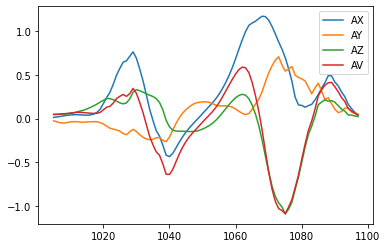

In [10]:
rng = np.random.RandomState(7)

# choose a sensor recording at random
index = rng.choice(len(data_train))
sensor_data, step_list = data_train[index], labels_train[index]

msg = f"""Metadata:
age\t\t{sensor_data.age},
gender\t\t{sensor_data.gender},
height\t\t{sensor_data.height},
weight\t\t{sensor_data.weight},
bmi\t\t{sensor_data.bmi},
laterality\t{sensor_data.laterality},
sensor\t\t{sensor_data.sensor},
pathology_group\t{sensor_data.pathology_group},
trial code\t{sensor_data.trial_code},
foot\t\t{sensor_data.foot}."""
print(msg)

# choose a step template at random
step_index = rng.choice(len(step_list))
start, end = step_list[step_index]

# only keep the acceleration (not the angular velocity)
# to reduce computations
template = sensor_data.signal[start:end][["AX", "AY", "AZ", "AV"]]
template.plot()

Sliding correlation between signal.AX and template.AX, signal.AY and template.AY, etc. Then max pooling across the four dimensions.

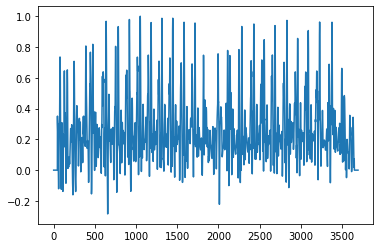

In [11]:
from scipy.signal import argrelmax

score = (sensor_data.signal[["AX", "AY", "AZ", "AV"]]  # select the accelerations
         .rolling(template.shape[0], center=True)  # sliding window of the same shape of the template
         .apply(lambda x: np.diag(np.corrcoef(x, template, rowvar=False), k=4), raw=True)  # correlation
         .max(axis=1)  # max pooling
         .fillna(0))  # to remove NaNs at the edges
score.plot()

The maximums of correlation corresponds to detected steps with our template.
All that remains is to find them automatically.
A simple peak detection heuristic consists in keeping all points that are greater than all samples in a small neighbourhood.
In addition, all values below a certain threshold are set to 0, to prevent from detecting steps with low correlations. 

Detected steps:
[[37, 117], [126, 206], [208, 288], [351, 431], [435, 515], [597, 677], [744, 824], [879, 959], [1011, 1091], [1143, 1223], [1274, 1354], [1406, 1486], [1543, 1623], [1676, 1756], [1779, 1859], [1956, 2036], [2072, 2152], [2244, 2324], [2391, 2471], [2516, 2596], [2647, 2727], [2792, 2872], [2922, 3002], [3050, 3130], [3189, 3269], [3339, 3419], [3458, 3538]]
(27 predicted steps, 23 actual steps)


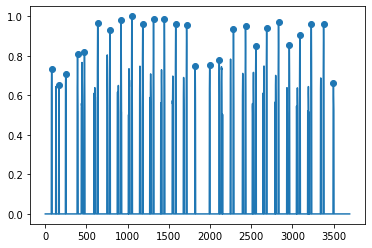

In [12]:
threshold = 0.5
order = 40  # size of the neighbourhood

score[score<threshold] = 0.0  # set to 0 all values below a threshold
indexes, = argrelmax(score.to_numpy(), order=order)  # to find local maxima

# plot the peaks
ax = score.plot()
ax.scatter(indexes, score[indexes])

# make the prediction
# detected steps are centered on the detected peaks and have size 2*order (here 80 samples, not very dynamic).
predicted_steps = [[t-order, t+order] for t in indexes]
print("Detected steps:")
print(predicted_steps)
print(f"({len(predicted_steps)} predicted steps, {len(step_list)} actual steps)")

We can compute the F-score on our training example, and then on a testing example.

In [13]:
from problem import FScoreStepDetection


fscore = FScoreStepDetection()([step_list], [predicted_steps])
print(f"(trial code: {sensor_data.trial_code}), foot: {sensor_data.foot}")
print(f"F-score: {fscore:.2f}")

(trial code: 3-13), foot: Right
F-score: 0.90


In [14]:
# testing example
index = rng.choice(len(data_train))
sensor_data, step_list = data_train[index], labels_train[index]

score = (sensor_data.signal[["AX", "AY", "AZ", "AV"]]  # select the accelerations
         .rolling(template.shape[0], center=True)  # sliding window of the same shape as the template
         .apply(lambda x: np.diag(np.corrcoef(x, template, rowvar=False), k=4), raw=True)  # correlations
         .max(axis=1)  # max pooling
         .fillna(0))  # to remove NaNs at the edges
score[score<threshold] = 0.0  # set to 0 all values below a threshold
indexes, = argrelmax(score.to_numpy(), order=order)  # to find local maxima
predicted_steps = [[t-order, t+order] for t in indexes]

fscore = FScoreStepDetection()([step_list], [predicted_steps])
print(f"(trial code: {sensor_data.trial_code}), foot: {sensor_data.foot}")
print(f"F-score: {fscore:.2f}")

(trial code: 3-243), foot: Right
F-score: 0.84


### Submitting to RAMP

The example solution presented above is implemented in the sample submission `submissions/starting_kit_1/estimator.py`. The code in this file defines a function called `get_estimator()` that returns a scikit-learn pipeline that performs the same steps as described above:

In [15]:
import numpy as np
from scipy.signal import argrelmax
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline

rng = np.random.RandomState(7)


class Detector(BaseEstimator):
    def __init__(self, threshold=0.5, order=40):
        self.threshold = threshold
        self.order = order
        self.step_template = None

    def fit(self, X, y):
        assert len(X) == len(
            y), f"Wrong dimensions (len(X): {len(X)}, len(y): {len(y)})."

        # take a step at random
        sensor_data, step_list = rng.choice([*zip(X, y)])
        start, end = rng.choice(step_list)
        self.step_template = sensor_data.signal[["AX", "AY", "AZ", "AV"]][start:end]
        return self

    def predict(self, X):
        y_pred = list()
        for sensor_data in X:
            score = (sensor_data.signal[["AX", "AY", "AZ", "AV"]]  # select the accelerations
                     # sliding window, same shape as the template
                     .rolling(self.step_template.shape[0], center=True)
                     # correlations
                     .apply(lambda x: np.diag(np.corrcoef(x, self.step_template, rowvar=False), k=4))
                     # max pooling
                     .max(axis=1)
                     # to remove NaNs at the edges
                     .fillna(0))
            # set to 0 all values below a threshold
            score[score < self.threshold] = 0.0
            # to find local maxima
            indexes, = argrelmax(score.to_numpy(), order=self.order)
            predicted_steps = [[t - self.order, t + self.order] for t in indexes]
            y_pred += [predicted_steps]
        return np.array(y_pred, dtype=list)


def get_estimator():
    # step detection
    detector = Detector()

    # make pipeline
    pipeline = Pipeline(steps=[('detector', detector)])

    return pipeline

The `get_estimator()` should return an object (your algorithm) with a `.fit()` and a `.predict()` method, which will be evaluated on a cross-validation.
Other files and functions will only be read/executed if they are read/executed by `get_estimator()`.

Another (even simpler) example can be found in `submissions/starting_kit/`.

In these examples, no real learning or hyperparameter search are performed, but any method will clearly benefit from such procedures. Once you have a submission ready, save your submission code in file named `estimator.py`, which should be stored in a folder (e.g., `my_submission`) within `submissions` (e.g., within `submissions/my_submission/estimator.py`). You can not test your code locally test with:

```
ramp-test --submission <submission folder name>
```

where `<submission folder name>` should be the name of the submission folder (e.g., `my_submission`).

**Check list.**
- Make sure you have installed ramp-workflow locally (see above)
- Make sure that the python file `estimator.py` is in `submissions/<submission folder>`, and the train and test data are in data
- If you haven't yet, download the data by executing

```
python download_data.py
```

Finally, make sure the local processing goes through by running the
```
ramp-test --submission <submission folder>
```
If you want to quickly test the that there are no obvious code errors, use the `--quick-test` flag to only use a small subset of the data (training and testing sets with 5 elements each).

```
ramp-test --submission <submission folder> --quick-test
```

See the [online documentation](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html) for more details.